# Extract light curve

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os

In [165]:
datadir = os.getcwd()

datadir = datadir + '/mast_files'

datafile4_lc = '/tess2018292075959-s0004-0000000270577175-0124-s/tess2018292075959-s0004-0000000270577175-0124-s_lc.fits'
datafile4_tp = '/tess2018292075959-s0004-0000000270577175-0124-s/tess2018292075959-s0004-0000000270577175-0124-s_tp.fits'

datafile5_lc = '/tess2018319095959-s0005-0000000270577175-0125-s/tess2018319095959-s0005-0000000270577175-0125-s_lc.fits'
datafile5_tp = '/tess2018319095959-s0005-0000000270577175-0125-s/tess2018319095959-s0005-0000000270577175-0125-s_tp.fits'

datafile6_lc = '/tess2018349182459-s0006-0000000270577175-0126-s/tess2018349182459-s0006-0000000270577175-0126-s_lc.fits'
datafile6_tp = '/tess2018349182459-s0006-0000000270577175-0126-s/tess2018349182459-s0006-0000000270577175-0126-s_tp.fits'

datafile7_lc = '/tess2019006130736-s0007-0000000270577175-0131-s/tess2019006130736-s0007-0000000270577175-0131-s_lc.fits'
datafile7_tp = '/tess2019006130736-s0007-0000000270577175-0131-s/tess2019006130736-s0007-0000000270577175-0131-s_tp.fits'

In [166]:
data4 = fits.getdata(datadir + datafile4_lc)
data5 = fits.getdata(datadir + datafile5_lc)
data6 = fits.getdata(datadir + datafile6_lc)
data7 = fits.getdata(datadir + datafile7_lc)

# Let's do some work on the light curves:
- remove nans in TIME and PDCSAP_FLUX
- remove non-zero quality flags
- remove event 1421 and 1424 in the first sector (sector 4) 

In [167]:
def remove_nans_quality(time, flux, quality):
    nan_mask_time = ~np.isnan(time)
    nan_mask_flux = ~np.isnan(flux)
    zero_quality  = quality == 0
    mask_comb = nan_mask_time & nan_mask_flux & zero_quality
    return [time[mask_comb], flux[mask_comb], quality[mask_comb]]

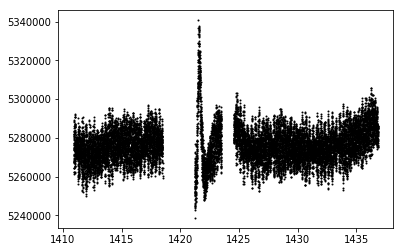

In [168]:
t4 = remove_nans_quality(data4['TIME'], data4['PDCSAP_FLUX'], data4['QUALITY'])[0]
f4 = remove_nans_quality(data4['TIME'], data4['PDCSAP_FLUX'], data4['QUALITY'])[1]

plt.scatter(t4, f4, s=1, c='k')
plt.show()

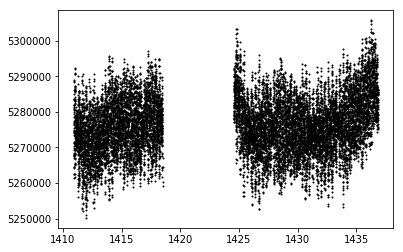

In [169]:
#remove instrumental thingy
mask_instrumental = (1421 < t4) & (t4 < 1424)

t4 = t4[~mask_instrumental]
f4 = f4[~mask_instrumental]

plt.scatter(t4, f4, s=1, c='k')
plt.show()

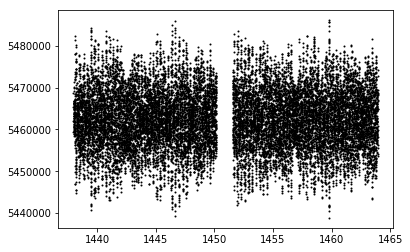

In [170]:
t5 = remove_nans_quality(data5['TIME'], data5['PDCSAP_FLUX'], data5['QUALITY'])[0]
f5 = remove_nans_quality(data5['TIME'], data5['PDCSAP_FLUX'], data5['QUALITY'])[1]

plt.scatter(t5, f5, s=1, c='k')
plt.show()

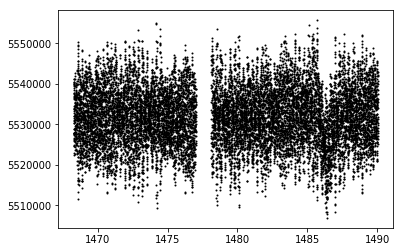

In [171]:
t6 = remove_nans_quality(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[0]
f6 = remove_nans_quality(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[1]

plt.scatter(t6, f6, s=1, c='k')
plt.show()

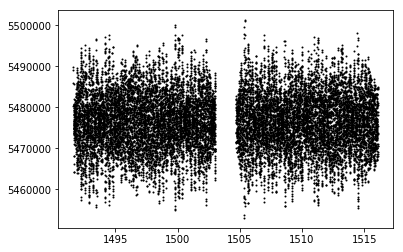

In [172]:
t7 = remove_nans_quality(data7['TIME'], data7['PDCSAP_FLUX'], data7['QUALITY'])[0]
f7 = remove_nans_quality(data7['TIME'], data7['PDCSAP_FLUX'], data7['QUALITY'])[1]

plt.scatter(t7, f7, s=1, c='k')
plt.show()

In [173]:
def div_median(flux):
    return flux / np.median(flux)

In [174]:
def comb(arr1, arr2, arr3, arr4):
    tmp1 = arr1.tolist()
    tmp2 = arr2.tolist()
    tmp3 = arr3.tolist()
    tmp4 = arr4.tolist()
    return tmp1 + tmp2 + tmp3 + tmp4

In [175]:
t = comb(t4, t5, t6, t7)
f = comb(div_median(f4), div_median(f5), div_median(f6), div_median(f7))

In [176]:
len(t)

62976

In [177]:
#The sectors 4 - 7 started approx. at the following BTJD time:
sectors = [1410.9, 1437.8, 1465.2, 1491.6]

<Figure size 432x288 with 0 Axes>

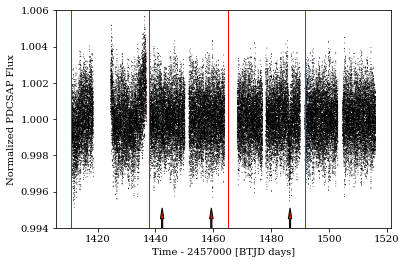

In [201]:
plt.rc('font', family='serif')
plt.tight_layout()

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(t, f, s=0.75, c='k', edgecolor = '')

ax.set_ylim(0.994, 1.006)

ax.set_xlabel('Time - 2457000 [BTJD days]')
ax.set_ylabel('Normalized PDCSAP Flux')

[ax.axvline(_x, linewidth=1, color='red', linestyle='-', alpha=1) for _x in sectors]

ax.arrow(1486.5, 0.994, 0, 0.0005, fc='r', ec='k', width=0.4, head_width=1.2, head_length=0.0006) #head_width=1, head_length=0.00001
ax.arrow(1459.3, 0.994, 0, 0.0005, fc='r', ec='k', width=0.4, head_width=1.2, head_length=0.0006)
ax.arrow(1442.3, 0.994, 0, 0.0005, fc='r', ec='k', width=0.4, head_width=1.2, head_length=0.0006)


plt.show()

fig.savefig('betaPic_lc_all.pdf', bbox_inches='tight')

In [489]:
min(t)

1410.9035242458917

In [453]:
datapairs=np.stack((t, -2.5*np.log10(f)), axis=-1)
np.savetxt('betaPic_mag_all.txt',datapairs)

# Additionally to the previous modifications, we want to remove 10 min before and after an momentum dump

In [16]:
def remove_nans_quality_md(time, flux, quality):
    nan_mask_time = ~np.isnan(time)
    nan_mask_flux = ~np.isnan(flux)
    zero_quality  = quality == 0
    
    mask_q = (quality == 32) | (quality == 128)
    
    ten_min = 10/1440


    mask_list= [np.logical_and(time>time[i]-ten_min, time<time[i]+ten_min) for i in np.where(mask_q)[0]]
    mask_md = np.logical_not(np.any(np.array(mask_list),axis=0))
    
    mask_comb = nan_mask_time & nan_mask_flux & zero_quality & mask_md
    return [time[mask_comb], flux[mask_comb], quality[mask_comb]]

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


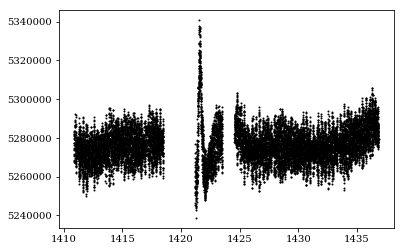

In [17]:
t4 = remove_nans_quality_md(data4['TIME'], data4['PDCSAP_FLUX'], data4['QUALITY'])[0]
f4 = remove_nans_quality_md(data4['TIME'], data4['PDCSAP_FLUX'], data4['QUALITY'])[1]

plt.scatter(t4, f4, s=1, c='k')

plt.show()

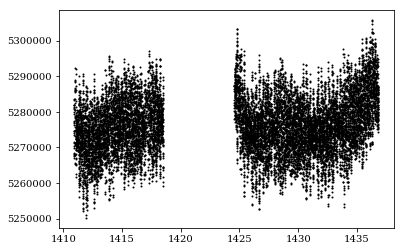

In [18]:
#remove instrumental thingy
mask_instrumental = (1421 < t4) & (t4 < 1424)

t4 = t4[~mask_instrumental]
f4 = f4[~mask_instrumental]

plt.scatter(t4, f4, s=1, c='k')
plt.show()

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


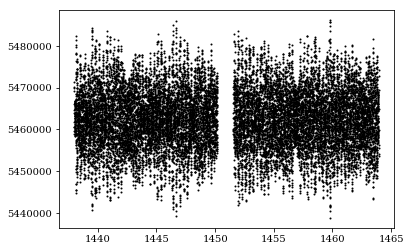

In [19]:
t5 = remove_nans_quality_md(data5['TIME'], data5['PDCSAP_FLUX'], data5['QUALITY'])[0]
f5 = remove_nans_quality_md(data5['TIME'], data5['PDCSAP_FLUX'], data5['QUALITY'])[1]

plt.scatter(t5, f5, s=1, c='k')
plt.show()

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


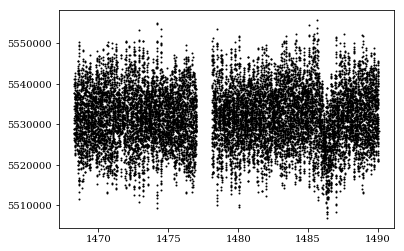

In [20]:
t6 = remove_nans_quality_md(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[0]
f6 = remove_nans_quality_md(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[1]

plt.scatter(t6, f6, s=1, c='k')
plt.show()

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


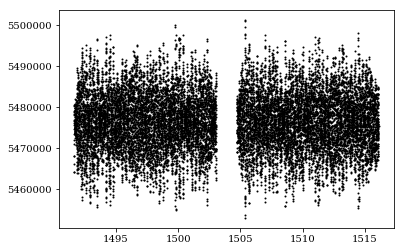

In [21]:
t7 = remove_nans_quality_md(data7['TIME'], data7['PDCSAP_FLUX'], data7['QUALITY'])[0]
f7 = remove_nans_quality_md(data7['TIME'], data7['PDCSAP_FLUX'], data7['QUALITY'])[1]

plt.scatter(t7, f7, s=1, c='k')
plt.show()

In [22]:
t = comb(t4, t5, t6, t7)
f = comb(div_median(f4), div_median(f5), div_median(f6), div_median(f7))

In [23]:
len(t)

62454

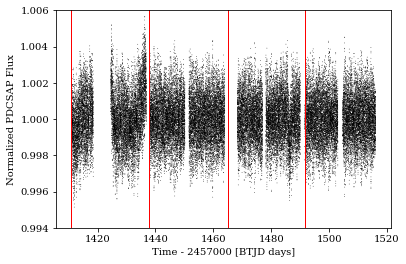

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(t, f, s=0.5, c='k', edgecolor = '')

ax.set_ylim(0.994, 1.006)

ax.set_xlabel('Time - 2457000 [BTJD days]')
ax.set_ylabel('Normalized PDCSAP Flux')

[ax.axvline(_x, linewidth=1, color='red', linestyle='-', alpha=1) for _x in sectors]

plt.show()

#fig.savefig('betaPic_lc_all.pdf', bbox_inches='tight')

(-0.01, 0.01)

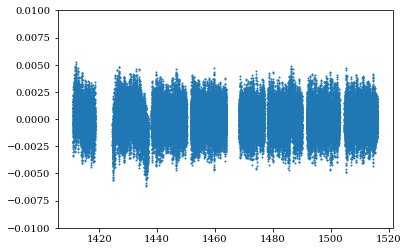

In [25]:
plt.scatter(t, -2.5*np.log10(f), s=1)
plt.ylim(-0.01, 0.01)

# For the frequency analysis we remove the 3 dimming events and the measurements done one hour earlier and later. We also remove the complete first sector (Sector 4)

In [26]:
# dimming times:
# -1 hour if start
# +1 hour if end

hour = 1/24

s1 = 1442.1 - hour
e1 = 1442.7 + hour
s2 = 1458.7 - hour
e2 = 1459.8 + hour
s3 = 1485.7 - hour
e3 = 1488.3 + hour

In [27]:
t = np.array(t)
f = np.array(f)

In [28]:
time_mask1 = (s1 < t) & (t < e1)
time_mask2 = (s2 < t) & (t < e2)
time_mask3 = (s3 < t) & (t < e3)

time_maskS4 = t < 1437.8

In [29]:
time_mask = ~time_mask1 & ~time_mask2 & ~time_mask3 & ~time_maskS4

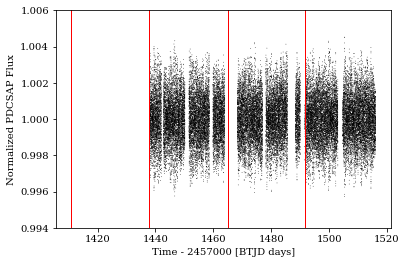

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(t[time_mask], f[time_mask], s=0.5, c='k', edgecolor = '')

#ax.set_xlim(1430, 1440)
ax.set_ylim(0.994, 1.006)

ax.set_xlabel('Time - 2457000 [BTJD days]')
ax.set_ylabel('Normalized PDCSAP Flux')

[ax.axvline(_x, linewidth=1, color='red', linestyle='-', alpha=1) for _x in sectors]



plt.show()

#fig.savefig('betaPic_lc_all.pdf', bbox_inches='tight')

In [31]:
min(t[time_mask])

1437.99844410725

In [34]:
datapairs=np.stack((t[time_mask], -2.5*np.log10(f[time_mask])), axis=-1)
np.savetxt('betaPic_mag_analysis.txt',datapairs)

(-0.01, 0.01)

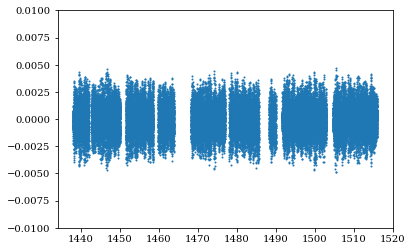

In [33]:
plt.scatter(t[time_mask], -2.5*np.log10(f[time_mask]), s=1)
plt.ylim(-0.01, 0.01)

# Aperture

In [41]:
import lightkurve as lk
import numpy as np

In [30]:
tpf4_path = datadir + datafile4_tp
tpf5_path = datadir + datafile5_tp
tpf6_path = datadir + datafile6_tp
tpf7_path = datadir + datafile7_tp

In [31]:
tpf4 = lk.targetpixelfile.TessTargetPixelFile(tpf4_path)
tpf5 = lk.targetpixelfile.TessTargetPixelFile(tpf5_path)
tpf6 = lk.targetpixelfile.TessTargetPixelFile(tpf6_path)
tpf7 = lk.targetpixelfile.TessTargetPixelFile(tpf7_path)

In [32]:
tpfs = [tpf4, tpf5, tpf6, tpf7]

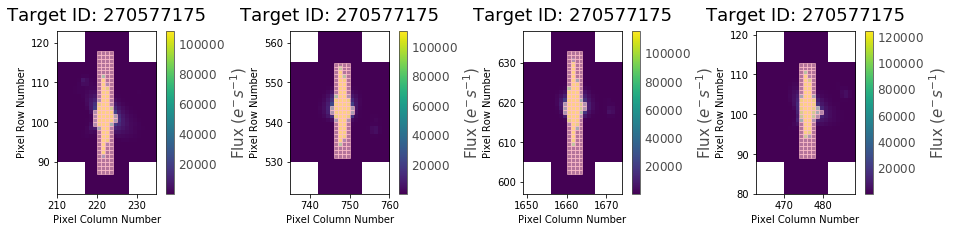

In [33]:
fig, axs = plt.subplots(1, 4, figsize=(16, 3))
for idx, tpf in enumerate(tpfs):
    aper = tpf.pipeline_mask
    tpf.plot(aperture_mask=aper, ax=axs[idx])

In [55]:
dF_event1 = 0.00037
dF_event2 = 0.00055
dF_event3 = 0.0019

betaPic_G_rp = 3.6777

In [56]:
2.5 * np.log10(1/dF_event1) + betaPic_G_rp

12.257195689832512

In [57]:
2.5 * np.log10(1/dF_event2) + betaPic_G_rp

11.826793276264391

In [58]:
2.5 * np.log10(1/dF_event3) + betaPic_G_rp

10.480815997617928

In [276]:
tpf5.interact_sky()

In [327]:
idx = tpf5.pipeline_mask

#a list of tuples with the coordinates where bottom left is [0,0]
column = []
for i in range(0,41):
    row = []
    for j in range(0,25):
        row.append([j,i])
    column.append(row)
    
column = np.array(column)

#gives back coords. of pxls that were used
mask_coords = np.array([val[idx[i]].tolist() for i, val in enumerate(column) if len(val[idx[i]].tolist()) > 0])

mask_coords[::-1]

array([list([[11, 32], [12, 32], [13, 32], [14, 32]]),
       list([[11, 31], [12, 31], [13, 31], [14, 31]]),
       list([[11, 30], [12, 30], [13, 30], [14, 30]]),
       list([[11, 29], [12, 29], [13, 29], [14, 29]]),
       list([[11, 28], [12, 28], [13, 28], [14, 28]]),
       list([[11, 27], [12, 27], [13, 27], [14, 27]]),
       list([[11, 26], [12, 26], [13, 26], [14, 26]]),
       list([[11, 25], [12, 25], [13, 25], [14, 25]]),
       list([[11, 24], [12, 24], [13, 24], [14, 24]]),
       list([[11, 23], [12, 23], [13, 23], [14, 23]]),
       list([[11, 22], [12, 22], [13, 22], [14, 22]]),
       list([[10, 21], [11, 21], [12, 21], [13, 21], [14, 21], [15, 21]]),
       list([[10, 20], [11, 20], [12, 20], [13, 20], [14, 20], [15, 20]]),
       list([[11, 19], [12, 19], [13, 19], [14, 19]]),
       list([[11, 18], [12, 18], [13, 18], [14, 18]]),
       list([[11, 17], [12, 17], [13, 17], [14, 17]]),
       list([[11, 16], [12, 16], [13, 16], [14, 16]]),
       list([[11, 15], [1

In [328]:
mask_coords_borders00 = [[10, 20], [11, 20], [11, 9]]
mask_coords_borders10 = [[14, 9], [14, 20], [15, 20]]
mask_coords_borders11 = [[15, 21], [14, 21], [14, 32]]
mask_coords_borders01 = [[11, 32], [11, 21],[10, 21]]

mask_coords_borders01 = [[i[0],i[1]+1] for i in mask_coords_borders01]
mask_coords_borders11 = [[i[0]+1,i[1]+1] for i in mask_coords_borders11]
mask_coords_borders10 = [[i[0]+1,i[1]] for i in mask_coords_borders10]

mask_coords_borders = mask_coords_borders00+mask_coords_borders10+mask_coords_borders11+mask_coords_borders01+[mask_coords_borders00[0]]

a5,b5=np.array(mask_coords_borders).T

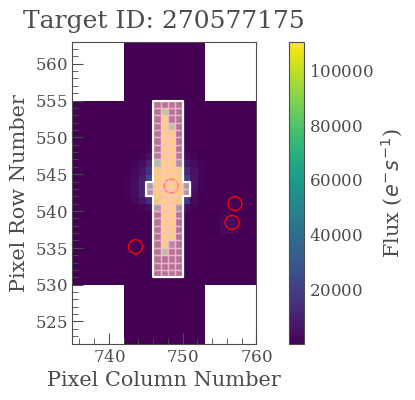

In [329]:
tpf5.plot(aperture_mask=tpf5.pipeline_mask);#aperture_mask=tpf5.pipeline_mask
plt.plot(a5+tpf5.column,b5+tpf5.row, c='w')
plt.scatter(748.445, 543.384, marker='o', s=100, facecolor='', edgecolor='r')
plt.scatter(756.710, 538.453, marker='o', s=100, facecolor='', edgecolor='r')
plt.scatter(757.107, 540.995, marker='o', s=100, facecolor='', edgecolor='r')
plt.scatter(743.603, 535.154, marker='o', s=100, facecolor='', edgecolor='r')

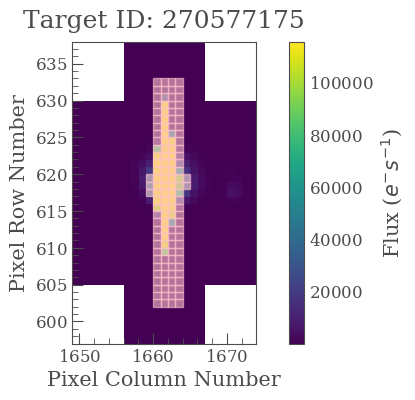

In [294]:
tpf6.plot(aperture_mask=tpf6.pipeline_mask)

In [330]:
idx = tpf6.pipeline_mask

#a list of tuples with the coordinates where bottom left is [0,0]
column = []
for i in range(0,41):
    row = []
    for j in range(0,25):
        row.append([j,i])
    column.append(row)
    
column = np.array(column)

#gives back coords. of pxls that were used
mask_coords = np.array([val[idx[i]].tolist() for i, val in enumerate(column) if len(val[idx[i]].tolist()) > 0])

mask_coords[::-1]

array([list([[11, 35], [12, 35], [13, 35], [14, 35]]),
       list([[11, 34], [12, 34], [13, 34], [14, 34]]),
       list([[11, 33], [12, 33], [13, 33], [14, 33]]),
       list([[11, 32], [12, 32], [13, 32], [14, 32]]),
       list([[11, 31], [12, 31], [13, 31], [14, 31]]),
       list([[11, 30], [12, 30], [13, 30], [14, 30]]),
       list([[11, 29], [12, 29], [13, 29], [14, 29]]),
       list([[11, 28], [12, 28], [13, 28], [14, 28]]),
       list([[11, 27], [12, 27], [13, 27], [14, 27]]),
       list([[11, 26], [12, 26], [13, 26], [14, 26]]),
       list([[11, 25], [12, 25], [13, 25], [14, 25]]),
       list([[11, 24], [12, 24], [13, 24], [14, 24]]),
       list([[11, 23], [12, 23], [13, 23], [14, 23]]),
       list([[10, 22], [11, 22], [12, 22], [13, 22], [14, 22], [15, 22]]),
       list([[10, 21], [11, 21], [12, 21], [13, 21], [14, 21], [15, 21]]),
       list([[10, 20], [11, 20], [12, 20], [13, 20], [14, 20]]),
       list([[11, 19], [12, 19], [13, 19], [14, 19]]),
       list([[1

In [333]:
mask_coords_borders00 = [[10, 20], [11, 20], [11, 5]]
mask_coords_borders10 = [[14, 5], [14, 21], [15, 21]]
mask_coords_borders11 = [[15, 22], [14, 22], [14, 35]]
mask_coords_borders01 = [[11, 35], [11, 22],[10, 22]]

mask_coords_borders01 = [[i[0],i[1]+1] for i in mask_coords_borders01]
mask_coords_borders11 = [[i[0]+1,i[1]+1] for i in mask_coords_borders11]
mask_coords_borders10 = [[i[0]+1,i[1]] for i in mask_coords_borders10]

mask_coords_borders = mask_coords_borders00+mask_coords_borders10+mask_coords_borders11+mask_coords_borders01+[mask_coords_borders00[0]]

a6,b6=np.array(mask_coords_borders).T

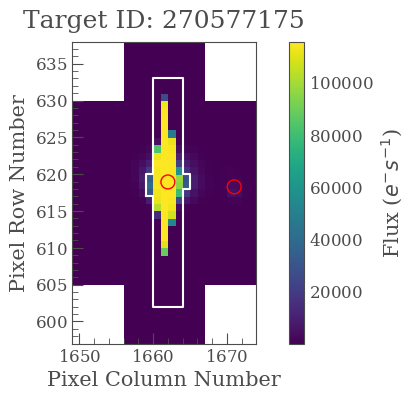

In [337]:
tpf6.plot();#aperture_mask=tpf6.pipeline_mask
plt.plot(a6+tpf6.column,b6+tpf6.row, c='w')
plt.scatter(1662, 618.942, marker='o', s=100, facecolor='', edgecolor='r')
plt.scatter(1671, 618.276, marker='o', s=100, facecolor='', edgecolor='r')

In [335]:
tpf6.interact_sky()

<Figure size 432x288 with 0 Axes>

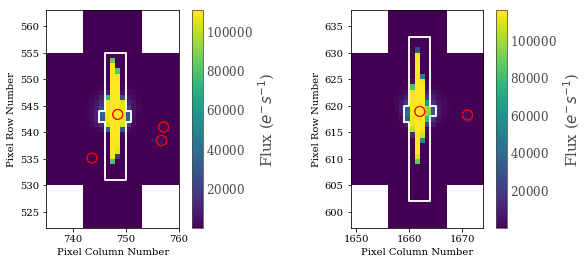

In [350]:
plt.rc('font', family='serif')
plt.tight_layout()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for idx, tpf in enumerate([tpf5,tpf6]):
    aper = tpf.pipeline_mask
    tpf.plot(ax=axs[idx])
    
    axs[0].set_title('')
    axs[1].set_title('')
    
    axs[0].plot(a5+tpf5.column,b5+tpf5.row, c='w')
    axs[0].scatter(748.445, 543.384, marker='o', s=100, facecolor='', edgecolor='r')
    axs[0].scatter(756.710, 538.453, marker='o', s=100, facecolor='', edgecolor='r')
    axs[0].scatter(757.107, 540.995, marker='o', s=100, facecolor='', edgecolor='r')
    axs[0].scatter(743.603, 535.154, marker='o', s=100, facecolor='', edgecolor='r')
    
    axs[1].plot(a6+tpf6.column,b6+tpf6.row, c='w')
    axs[1].scatter(1662, 618.942, marker='o', s=100, facecolor='', edgecolor='r')
    axs[1].scatter(1671, 618.276, marker='o', s=100, facecolor='', edgecolor='r')
    
    
fig.savefig('betaPic_otherstars.pdf', bbox_inches='tight')

In [64]:
tpf4.pixelx

AttributeError: 'TessTargetPixelFile' object has no attribute 'pixelx'

In [66]:
tpf4.header[1]

8

In [68]:
with fits.open(tpf4_path, mode="readonly") as hdulist:
    aperture = hdulist[2].data

In [70]:
print(aperture)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [83]:
tpf4.column

210

In [49]:
for tpf in tpfs:
    print(tpf.pipeline_mask.shape)
    print(sum(tpf.pipeline_mask))
    r, c = tpf.estimate_centroids()
    print(np.median(r))
    print(np.median(c))

(41, 25)
[ 0  0  0  0  0  0  0  0  0  4 31 31 31 31  2  0  0  0  0  0  0  0  0  0
  0]
221.72777287809524
101.78471569572389
(41, 25)
[ 0  0  0  0  0  0  0  0  0  0  2 24 24 24 24  2  0  0  0  0  0  0  0  0
  0]
747.975068015818
543.7304538786004
(41, 25)
[ 0  0  0  0  0  0  0  0  0  0  3 31 31 31 31  2  0  0  0  0  0  0  0  0
  0]
1661.7014340276476
619.4639396240314
(41, 25)
[ 0  0  0  0  0  0  0  0  0  0  0 24 24 24 24  3  1  0  0  0  0  0  0  0
  0]
476.0861693565978
101.98113803647956


In [48]:
sum(tpf4.pipeline_mask)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4, 31, 31, 31, 31,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [139]:
tpf7.interact_sky()

In [5]:
tpf4 = fits.getdata(datadir + datafile4_tp)
tpf5 = fits.getdata(datadir + datafile5_tp)
tpf6 = fits.getdata(datadir + datafile6_tp)
tpf7 = fits.getdata(datadir + datafile7_tp)

In [9]:
hdul = fits.open(datadir + datafile4_tp)

In [11]:
hdul[1].header

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                20528 / length of first array dimension                
NAXIS2  =                18684 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   11 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2457000, days' / column units: Barycenter corrected TESS Julian
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

In [14]:
tpf4['RAW_cnts']

array([[[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]],

       [[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]],

       [[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]],

       ...,

       [[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1

In [161]:
t4 = data4['TIME']
f4 = data4['PDCSAP_FLUX']
t5 = data5['TIME']
f5 = data5['PDCSAP_FLUX']
t6 = data6['TIME']
f6 = data6['PDCSAP_FLUX']
t7 = data7['TIME']
f7 = data7['PDCSAP_FLUX']

In [162]:
def comb(arr1, arr2, arr3, arr4):
    tmp1 = arr1.tolist()
    tmp2 = arr2.tolist()
    tmp3 = arr3.tolist()
    tmp4 = arr4.tolist()
    return tmp1 + tmp2 + tmp3 + tmp4

In [163]:
t = comb(t4, t5, t6, t7)
f = comb(f4, f5, f6, f7)

In [164]:
datapairs=np.stack((t, f), axis=-1)
np.savetxt('betaPic_raw.txt',datapairs)